In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import temana as tm


In [2]:
def gen_puntos_ref_frecuencia(x0,x1):
    # Falta incluir una selección para saber si qjuieres
    # o no una frecuencia entera, also así como
    # if np.random.choice(["entero","no entero"]) == "entero":
    #   y = np.random.choice(low_frecuency)
    #   y = np.round(y)    
    # Incluir la opción de frecuencias medias
    # Dar más peso a las frecuencias bajas y medias
    
    # Elegimos aleatoriamente frecuencias altas
    high_frecuency = np.random.uniform(20,60,10)
    high_frecuency = np.sort(high_frecuency)
    # Elegimos aleatoriamente frecuencias bajas
    low_frecuency = np.random.uniform(1,5,10)
    low_frecuency = np.sort(low_frecuency)
    
    # elegimos aleatoriamente el número de puntos de cambio de frecuencia
    num_puntos = random.randint(1, 8)    
    partition = np.linspace(x0,x1,num_puntos+2)
    puntos = []
    # Inicializo el tipo de variación
    tipo_variacion = np.random.choice(["low","high"])
    # Inicializo la frecuenca
    y = 1
    for i in range(num_puntos+2):
        # Solo para la primera vez
        x = partition[i]
        if i == 0:            
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
            else:
                y = np.random.choice(high_frecuency)
        else:
            tipo_variacion = np.random.choice(["low","high","no_change"])
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
            elif tipo_variacion == "high":
                y = np.random.choice(high_frecuency)
            # No hay un caso contrario simplemente no se actualiza 
            # el valor anterior de y
        #print("y= ",y)
        puntos.append((x, y))
    
    return puntos
puntos = gen_puntos_ref_frecuencia(0,4*np.pi)
puntos

[(0.0, 4.487227296316767),
 (1.5707963267948966, 4.487227296316767),
 (3.141592653589793, 34.04716944609106),
 (4.71238898038469, 53.596352054407305),
 (6.283185307179586, 26.94297706120817),
 (7.853981633974483, 43.46322758319615),
 (9.42477796076938, 26.94297706120817),
 (10.995574287564276, 26.94297706120817),
 (12.566370614359172, 4.000419793072764)]

In [3]:
# voy a usar la función tm.mspline_t 
# para generar cambios de frecuencia
def genera_signalfv(x,xm):
    """"
        Entrada: 
            Vector de datos x para el súper muestreo.
            Vector de datos xm para el submuestreo.
        Salida:
            Señal del súpermuestreo y del submuestreo.

    """
    # Generamos la función de cambio de frecuencias
    puntos = gen_puntos_ref_frecuencia(x[0],x[-1])
    xf, yf = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice([1, 3, 5, 8, 10, 12, 15, 20])
    
    choose = np.random.randint(0,2,1)
    choose2 = np.random.randint(0,2,1)
    A = (2*np.random.rand()-1)*np.random.randint(1,6,1) #Amplitud
    B = tm.mspline_t(xf,yf,tau) #frecuencia
    C = (2*np.random.rand()-1)*np.random.randint(1,10,1) #traslación
    D = (np.random.rand())*np.pi #fase  
    puntos = tm.gen_puntos_ref(xm[0],xm[-1])

    if choose == 0:
        # Generamos la señal basados en el seno
        y = A*np.sin(B(x)*(x-D))
        ym = A*np.sin(B(xm)*(xm-D))         
    else:
        #Generamos la señal basados en el coseno
        y = A*np.cos(B(x)*(x-D)) 
        ym = A*np.cos(B(xm)*(xm-D)) 
    
    puntos = tm.gen_puntos_ref(x[0],x[-1])
    xs, ys = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice([1, 3, 5, 8, 10, 12, 15, 20])
    
    if choose2 == 0:        #Splines de tensión aleatoria
        y = tm.mspline_t(xs,ys,tau)(x)*y + C
        ym = tm.mspline_t(xs,ys,tau)(xm)*ym + C
    else:               #Splines de tensión ifinita
        y = tm.msplin_zero(puntos)(x)*y + C
        ym = tm.msplin_zero(puntos)(xm)*ym + C

    return([y, ym])

In [10]:
x = np.linspace(0,4*np.pi,5000)
xm = np.linspace(0,4*np.pi,1000)

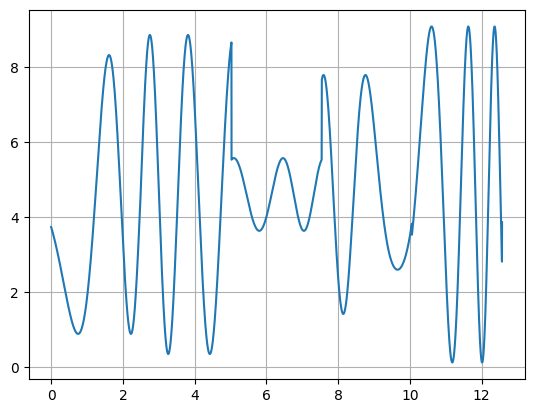

In [54]:
y,ym = genera_signalfv(x,xm)
plt.plot(x,y)
plt.grid()

In [4]:
y1,ym2 = genera_signalfv(x,xm)
plt.plot(x,y1)
plt.grid()

NameError: name 'x' is not defined

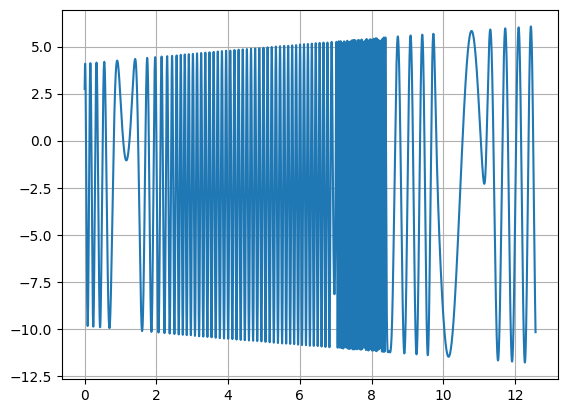

In [56]:
y2,ym2 = genera_signalfv(x,xm)
plt.plot(x,y2)
plt.grid()

In [6]:
def genPuntosFreqNU(x0,x1):
    # NU significa con partición No Uniforme 
    # Falta incluir una selección para saber si qjuieres
    # o no una frecuencia entera, also así como
    # if np.random.choice(["entero","no entero"]) == "entero":
    #   y = np.random.choice(low_frecuency)
    #   y = np.round(y)    
    # Incluir la opción de frecuencias medias
    # Dar más peso a las frecuencias bajas y medias
    
    # Elegimos aleatoriamente frecuencias altas
    high_frecuency = np.random.uniform(5,60,10)
    high_frecuency = np.sort(high_frecuency)
    # Elegimos aleatoriamente frecuencias bajas
    low_frecuency = np.random.uniform(1,5,10)
    low_frecuency = np.sort(low_frecuency)
    
    # elegimos aleatoriamente el número de puntos de cambio de frecuencia
    num_puntos = random.randint(2, 11)    
    tdom = np.zeros(num_puntos + 2) # Para almacenar el 0 y el 1
    tdom[-1] = 1
    tdom[1:-1] = np.sort(np.random.rand(num_puntos)) 
    partition = x0 + (x1 - x0) * tdom 
    #partition = np.linspace(x0,x1,num_puntos+2)
    puntos = []
    tipo = []
    # Inicializo el tipo de variación
    tipo_variacion = np.random.choice(["low","high"],p=[0.98,0.02])
    # Inicializo la frecuenca
    y = 1
    for i in range(num_puntos + 2):
        # Solo para la primera vez
        x = partition[i]
        if i == 0:            
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
                tipo.append("low")
            else:
                y = np.random.choice(high_frecuency)
                tipo.append("high")
        else:
            # forzamos a cambiar las frecuencias altas 
            if tipo[-1] == "high":
                tipo_variacion = np.random.choice(["low","no_change"],p=[0.95,0.05])
            else:
                tipo_variacion = np.random.choice(["low","high","no_change"],p=[0.20,0.05,0.75])
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
                tipo.append(tipo_variacion)
            elif tipo_variacion == "high":
                y = np.random.choice(high_frecuency)
                tipo.append(tipo_variacion)
            else:
                tipo.append(tipo[-1])
            # No hay un caso contrario simplemente no se actualiza 
            # el valor anterior de y
        #print("y= ",y)
        puntos.append((x, y))
    
    return (puntos,tipo)


In [7]:
puntos = genPuntosFreqNU(0,4*np.pi)
puntos

([(0.0, 4.994716037509324),
  (1.411996842265267, 3.6472561039983025),
  (12.230411078507778, 3.6472561039983025),
  (12.559380556137182, 15.663334521857589),
  (12.566370614359172, 2.1052986219554626)],
 ['low', 'low', 'low', 'high', 'low'])

In [8]:
# voy a usar la función tm.mspline_t 
# para generar cambios de frecuencia
def generaSignalFvNU(x,xm):
    """"
        Entrada: 
            Vector de datos x para el súper muestreo.
            Vector de datos xm para el submuestreo.
        Salida:
            Señal del súpermuestreo y del submuestreo.

    """
    # Generamos la función de cambio de frecuencias
    puntos, tipo = genPuntosFreqNU(x[0],x[-1])
    xf, yf = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
    print("Tipo",tipo)
    print("tau:",tau)
    
    choose = np.random.randint(0,2,1)
    choose2 = np.random.randint(0,2,1)
    A = (2*np.random.rand()-1)*np.random.randint(1,6,1) #Amplitud
    B = tm.mspline_t(xf,yf,tau) #frecuencia
    C = (2*np.random.rand()-1)*np.random.randint(1,10,1) #traslación
    D = (np.random.rand())*np.pi #fase  
    puntos = tm.gen_puntos_ref(xm[0],xm[-1])

    if choose == 0:
        # Generamos la señal basados en el seno
        y = A*np.sin(B(x)*(x-D))
        ym = A*np.sin(B(xm)*(xm-D))         
    else:
        #Generamos la señal basados en el coseno
        y = A*np.cos(B(x)*(x-D)) 
        ym = A*np.cos(B(xm)*(xm-D)) 
    
    puntos = tm.gen_puntos_ref(x[0],x[-1])
    xs, ys = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice(np.linspace(1,2,21))
    print("tau2: ", tau)
    if choose2 == 0:        #Splines de tensión aleatoria
        y = tm.mspline_t(xs,ys,tau)(x)*y + C
        ym = tm.mspline_t(xs,ys,tau)(xm)*ym + C
    else:               #Splines de tensión ifinita
        y = tm.msplin_zero(puntos)(x)*y + C
        ym = tm.msplin_zero(puntos)(xm)*ym + C

    return([y, ym])

Tipo ['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
tau: 1.7
tau2:  1.1


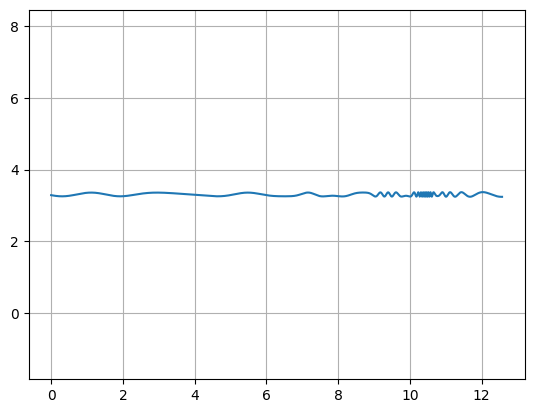

In [28]:
y1,ym2 = generaSignalFvNU(x,xm)
plt.plot(x,y1)
plt.axis("equal")
plt.grid()

In [566]:
def genPuntosFreqNU_H(x0,x1):
        
    # Elegimos aleatoriamente frecuencias altas
    high_frecuency = np.random.uniform(20,100,10)
    high_frecuency = np.sort(high_frecuency)
    # Elegimos aleatoriamente frecuencias bajas
    low_frecuency = np.random.uniform(1,5,10)
    low_frecuency = np.sort(low_frecuency)
    
    # elegimos aleatoriamente el número de puntos de cambio de frecuencia
    num_puntos = random.randint(2, 11)    
    tdom = np.zeros(num_puntos + 2) # Para almacenar el 0 y el 1
    tdom[-1] = 1
    tdom[1:-1] = np.sort(np.random.rand(num_puntos)) 
    partition = x0 + (x1 - x0) * tdom 
    #partition = np.linspace(x0,x1,num_puntos+2)
    puntos = []
    tipo = []
    tdom_h = [tdom[0]] # Solo incluye información de altas frecunecias
    y_h = []
    
    # Inicializo el tipo de variación
    tipo_variacion = np.random.choice(["low","high"],p=[0.96,0.04])
    # Inicializo la frecuenca
    y = 1
    for i in range(num_puntos + 2):
        # Solo para la primera vez
        x = partition[i]
        
        if i == 0:            
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
                tipo.append("low")
                y_h.append(0)
            else:
                y = np.random.choice(low_frecuency) # Elige una frecuencia baja para transportar la frecuencia alta
                tipo.append("high")
                tdom_h.append(np.random.uniform(partition[i],partition[i+1],1)[0])
                yh_temporal = np.random.choice(high_frecuency)
                y_h.append(yh_temporal)
                y_h.append(yh_temporal)

        else:
            # forzamos a cambiar las frecuencias altas 
            if tipo[-1] == "high":
                tipo_variacion = np.random.choice(["low","no_change"],p=[0.95,0.05])
            else:
                tipo_variacion = np.random.choice(["low","high","no_change"],p=[0.20,0.07,0.73])
            if tipo_variacion == "low":
                y = np.random.choice(low_frecuency)
                y_h.append(0)
                tdom_h.append(x)
                tipo.append(tipo_variacion)

            elif tipo_variacion == "high":
                y = np.random.choice(low_frecuency) # Elige una frecuencia baja para transportar la frecuencia alta
                tipo.append("high")
                tdom_h.append(x)                
                if i != num_puntos+1:
                    yh_temporal = np.random.choice(high_frecuency)
                    tdom_h.append(np.random.uniform(partition[i],partition[i+1],1)[0])                    
                    y_h.append(yh_temporal)
                    y_h.append(yh_temporal)
                else:
                    y_h.append(0)              
                    
            else:
                tipo.append(tipo[-1])
                y_h.append(0)
                tdom_h.append(x)
            # No hay un caso contrario simplemente no se actualiza 
            # el valor anterior de y
        #print("y= ",y)
        puntos.append((x, y))
    puntos_h = [(tdom_h[i],y_h[i]) for i in range(len(tdom_h))]
    
    return (puntos,puntos_h,tipo)


puntos:  [(0.0, 2.917787124317427), (0.20353572694631472, 2.917787124317427), (7.557082891641363, 4.6999559982362555), (10.556112183966748, 4.6999559982362555), (10.695470402551459, 4.6999559982362555), (12.566370614359172, 1.5321329620407114)]
puntos_h:  [(0.0, 0), (0.20353572694631472, 0), (7.557082891641363, 0), (10.556112183966748, 0), (10.695470402551459, 0), (12.566370614359172, 0)]
['low', 'low', 'low', 'low', 'low', 'high']


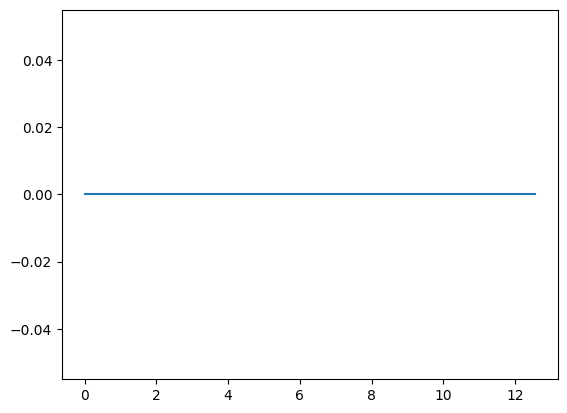

In [567]:
puntos, puntos_h, tipo = genPuntosFreqNU_H(0,4*np.pi)
print("puntos: ",puntos)
print("puntos_h: ",puntos_h)
print(tipo)
t = np.linspace(0, 4*np.pi, 400)
yt = tm.msplin_zero(puntos_h)(t)
plt.plot(t,yt)

In [706]:
# voy a usar la función tm.mspline_t 
# para generar cambios de frecuencia
def generaSignalFvNU_H(x,xm):
    """"
        Entrada: 
            Vector de datos x para el súper muestreo.
            Vector de datos xm para el submuestreo.
        Salida:
            Señal del súpermuestreo y del submuestreo.

    """
    # Generamos la función de cambio de frecuencias
    puntos, puntos_h, tipo = genPuntosFreqNU_H(x[0],x[-1])
    xf, yf = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
    print("Tipo",tipo)
    print("tau:",tau)
    
    #choose = np.random.randint(0,2,1)
    choose = np.random.choice([0, 1],1)
    #choose2 = np.random.randint(0,2,1)
    choose2 = np.random.choice([0,1],1,p=[0.98,0.02])

    A = (2*np.random.rand()-1)*np.random.randint(1,6,1) #Amplitud
    B = tm.mspline_t(xf,yf,tau) #frecuencia
    C = (2*np.random.rand()-1)*np.random.randint(1,10,1) #traslación
    D = (np.random.rand())*np.pi #fase  
    #puntos = tm.gen_puntos_ref(xm[0],xm[-1])


    if choose == 0:
        # Generamos la señal basados en el seno
        y = A*np.sin(B(x)*(x-D)) 
        ym = A*np.sin(B(xm)*(xm-D))    
    else:
        #Generamos la señal basados en el coseno
        y = A*np.cos(B(x)*(x-D)) 
        ym = A*np.cos(B(xm)*(xm-D)) 
    
    puntos = tm.gen_puntos_ref(x[0],x[-1])
    xs, ys = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice(np.linspace(1,2,21))
    print("tau2: ", tau)
    amplitud_ruido = np.random.uniform(0.08,0.2,1)
    
    ruido = amplitud_ruido*tm.mspline_t(xs,ys,tau)(x)*np.sin(tm.msplin_zero(puntos_h)(x)*x)
    ruidom = amplitud_ruido*tm.mspline_t(xs,ys,tau)(xm)*np.sin(tm.msplin_zero(puntos_h)(xm)*xm)
    
    if choose2 == 0:        #Splines de tensión aleatoria
        y = tm.mspline_t(xs,ys,tau)(x)*y + C  + ruido
        ym = tm.mspline_t(xs,ys,tau)(xm)*ym + C + ruidom
    else:               #Splines de tensión ifinita
        y = tm.msplin_zero(puntos)(x)*y + C + ruido
        ym = tm.msplin_zero(puntos)(xm)*ym + C + ruidom

    return([y, ym,ruido])

In [570]:
x = np.linspace(0,4*np.pi,1000)
xm = np.linspace(0,4*np.pi,200)


Tipo ['high', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
tau: 1.0
tau2:  1.15


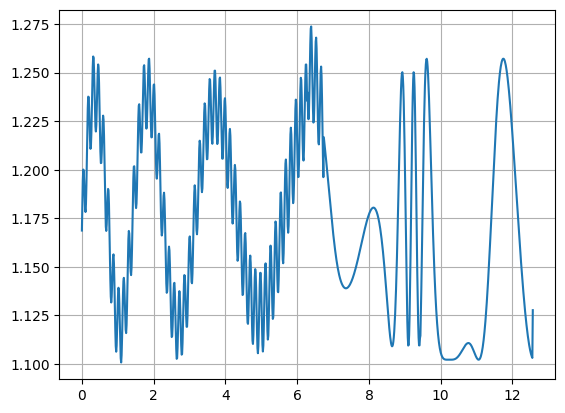

In [580]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['low', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low']
tau: 2.0
tau2:  2.0


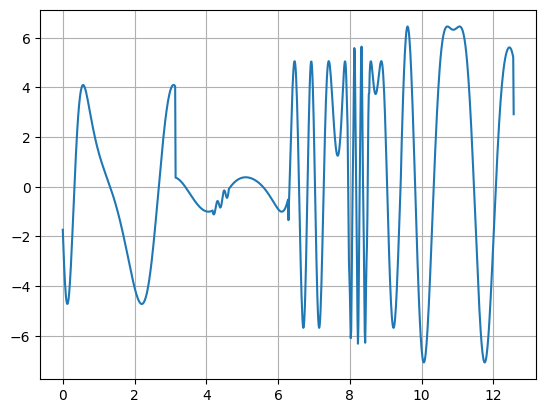

In [582]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['low', 'low', 'low', 'low', 'low', 'high', 'low']
tau: 1.9
tau2:  1.8


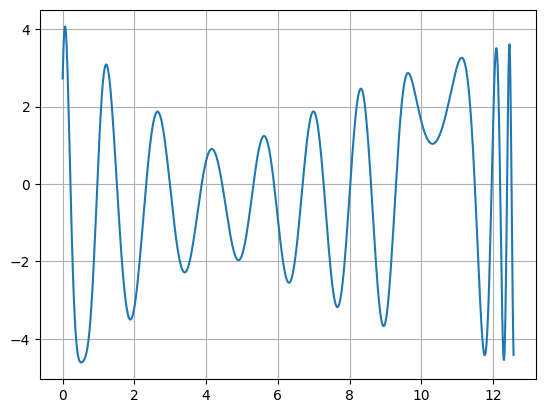

In [583]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['low', 'low', 'low', 'low']
tau: 1.3
tau2:  1.15


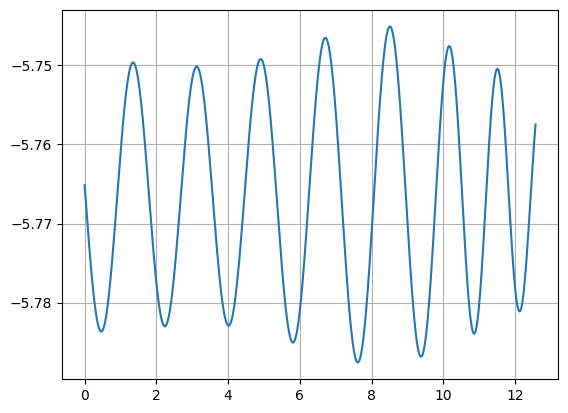

In [584]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['low', 'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
tau: 1.7
tau2:  1.4


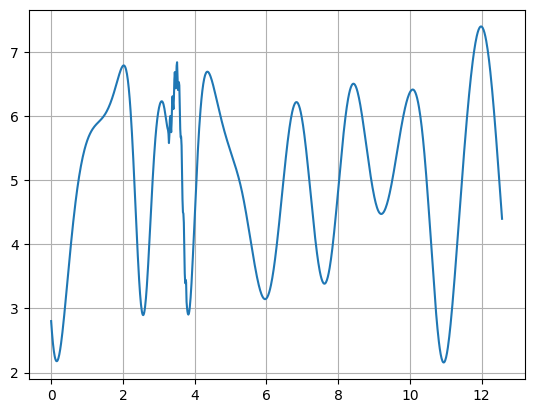

In [589]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['high', 'high', 'low', 'low', 'low']
tau: 1.6
tau2:  1.45


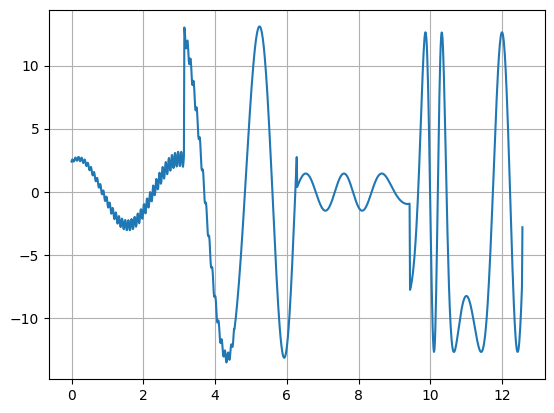

In [590]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

Tipo ['low', 'low', 'low', 'low', 'high', 'low', 'low']
tau: 1.6
tau2:  1.3


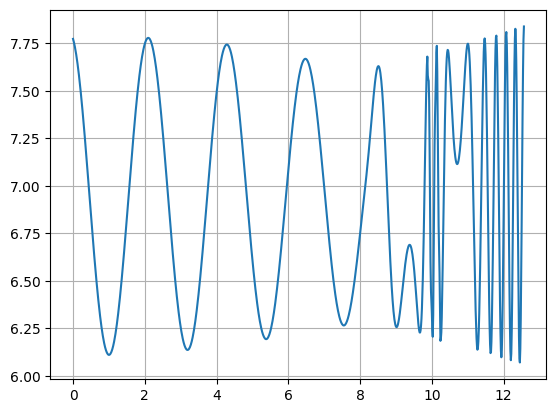

In [715]:
y, ym,ruido = generaSignalFvNU_H(x, xm)
plt.plot(x,y)
plt.grid()

In [721]:
# voy a usar la función tm.mspline_t 
# para generar cambios de frecuencia
def generaListSignalFvNU_H(x,len_x):
    """"
        Entrada: 
            Vector de datos x para el súper muestreo.
            Lista de tamaños de señale del supermuestro  len_x = [250,500,1000]             
        Salida:
            Señal del súpermuestreo y del submuestreo.
    """
    # Generamos la función de cambio de frecuencias
    puntos, puntos_h, tipo = genPuntosFreqNU_H(x[0],x[-1])
    list_x = [np.linspace(x[0],x[-1],lx) for lx in len_x] 
    xf, yf = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
    print("Tipo",tipo)
    print("tau:",tau)
    
    #choose = np.random.randint(0,2,1)
    choose = np.random.choice([0, 1],1)
    #choose2 = np.random.randint(0,2,1)
    choose2 = np.random.choice([0,1],1,p=[0.98,0.02])

    A = (2*np.random.rand()-1)*np.random.randint(1,6,1) #Amplitud
    B = tm.mspline_t(xf,yf,tau) #frecuencia
    C = (2*np.random.rand()-1)*np.random.randint(1,10,1) #traslación
    D = (np.random.rand())*np.pi #fase  
    #puntos = tm.gen_puntos_ref(xm[0],xm[-1])


    if choose == 0:
        # Generamos la señal basados en el seno
        y = A*np.sin(B(x)*(x-D)) 
        list_y = [A*np.sin(B(xm)*(xm-D)) for xm in list_x]    
    else:
        #Generamos la señal basados en el coseno
        y = A*np.cos(B(x)*(x-D)) 
        list_y = [A*np.cos(B(xm)*(xm-D)) for xm in list_x] 
    
    puntos = tm.gen_puntos_ref(x[0],x[-1])
    xs, ys = zip(*puntos) # Desempaquetamos los puntos
    tau = np.random.choice(np.linspace(1,2,21))
    print("tau2: ", tau)
    amplitud_ruido = np.random.uniform(0.08,0.2,1)
    
    ruido = amplitud_ruido*tm.mspline_t(xs,ys,tau)(x)*np.sin(tm.msplin_zero(puntos_h)(x)*x)
    list_ruido = [amplitud_ruido*tm.mspline_t(xs,ys,tau)(xm)*np.sin(tm.msplin_zero(puntos_h)(xm)*xm)
              for xm in list_x]
    
    if choose2 == 0:        #Splines de tensión aleatoria
        y = tm.mspline_t(xs,ys,tau)(x)*y + C  + ruido
        list_y = [tm.mspline_t(xs,ys,tau)(xm)*ym + C + ruidom for xm,ruidom,ym in zip(list_x,list_ruido,list_y)]
    else:               #Splines de tensión ifinita
        y = tm.msplin_zero(puntos)(x)*y + C + ruido
        list_y = [tm.msplin_zero(puntos)(xm)*ym + C + ruidom for xm,ruidom,ym in zip(list_x,list_ruido,list_y)]

    return([y, list_y,ruido])

In [732]:
y, ly,ruido = generaListSignalFvNU_H(x,[150,250,500,1000])

Tipo ['low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
tau: 1.8
tau2:  1.05


In [728]:
len(y)

1000

In [720]:
ly

array([7.77296693, 7.71974098, 7.64134691, 7.54040355, 7.42026513,
       7.28490968, 7.13880716, 6.98677174, 6.83380312, 6.68492211,
       6.54500576, 6.41862773, 6.30990885, 6.22238285, 6.15888167,
       6.12144406, 6.11125028, 6.12858522, 6.17283085, 6.24248833,
       6.33522893, 6.44797205, 6.57698771, 6.71802008, 6.86642798,
       7.01733773, 7.16580325, 7.30696819, 7.43622484, 7.54936445,
       7.64271426, 7.71325661, 7.75872644, 7.77768385, 7.76955953,
       7.73467163, 7.67421344, 7.59021259, 7.48546293, 7.36343146,
       7.2281435 , 7.08404975, 6.93587975, 6.78848646, 6.64668721,
       6.51510602, 6.39802266, 6.29923326, 6.22192701, 6.168583  ,
       6.14089052, 6.13969542, 6.1649741 , 6.21583621, 6.29055559,
       6.38662871, 6.50085837, 6.62946015, 6.76818784, 6.9124739 ,
       7.05758023, 7.19875427, 7.33138547, 7.45115667, 7.55418578,
       7.63715284, 7.69740837, 7.73306013, 7.74304073, 7.72713819,
       7.68599372, 7.62107514, 7.53462334, 7.42957361, 7.30945

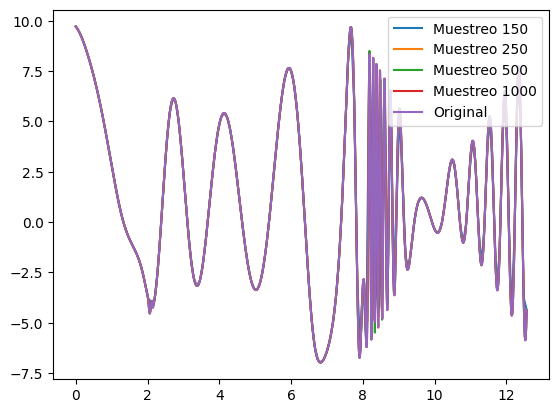

In [733]:
leyenda = ["Muestreo 150","Muestreo 250","Muestreo 500","Muestreo 1000"]
longitudes = [150,250,500,1000]
for i in range(len(leyenda)):
    plt.plot(np.linspace(x[0],x[-1],longitudes[i]),ly[i],
             label=leyenda[i])
    plt.legend()
plt.plot(x,y,label="Original")
plt.legend()

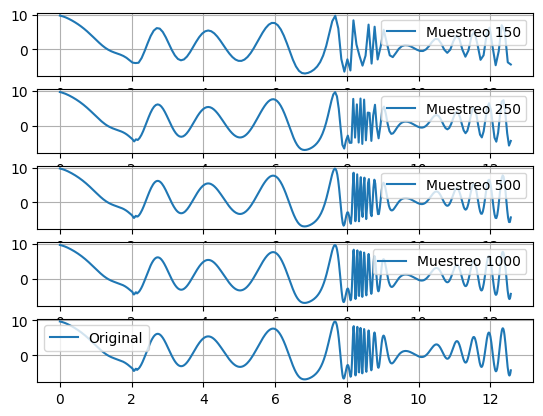

In [734]:
fig, axs = plt.subplots(5,1)
for i in range(len(leyenda)):
    axs[i].plot(np.linspace(x[0],x[-1],longitudes[i]),ly[i],
             label=leyenda[i])
    axs[i].legend()
    axs[i].grid()
axs[4].plot(x,y,label="Original")
axs[4].legend()
axs[4].grid()

In [ ]:
plt.g